In [1]:
import pandas as pd
bolly_df = pd.read_csv("bollywood.csv")

In [2]:
bolly_df.head(5)

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes
0,1,18-Apr-14,2 States,LW,Romance,36,104.00,8576361,26622,2527
1,2,4-Jan-13,Table No. 21,N,Thriller,10,12.00,1087320,1129,137
2,3,18-Jul-14,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54
3,4,4-Jan-13,Rajdhani Express,N,Drama,7,0.35,42626,86,19
4,5,4-Jul-14,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224


In [3]:
# How many records are present in the dataset?
bolly_df.shape

(149, 10)

In [4]:
#  Print the metadata information of the dataset.
bolly_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SlNo                 149 non-null    int64  
 1   Release Date         149 non-null    object 
 2   MovieName            149 non-null    object 
 3   ReleaseTime          149 non-null    object 
 4   Genre                149 non-null    object 
 5   Budget               149 non-null    int64  
 6   BoxOfficeCollection  149 non-null    float64
 7   YoutubeViews         149 non-null    int64  
 8   YoutubeLikes         149 non-null    int64  
 9   YoutubeDislikes      149 non-null    int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 11.8+ KB


In [5]:
# How many movies got released in each genre? Which genre had highest number of releases? Sort number of releases in each genre in descending order.
bolly_df['Genre'].value_counts()

Comedy       36
 Drama       35
Thriller     26
Romance      25
Action       21
Thriller      3
Action        3
Name: Genre, dtype: int64

In [6]:
pd.crosstab(bolly_df['Genre'],bolly_df['ReleaseTime'])

ReleaseTime,FS,HS,LW,N
Genre,,,,
Drama,4,6,1,24
Action,3,3,3,12
Action,0,0,0,3
Comedy,3,5,5,23
Romance,3,3,4,15
Thriller,4,1,1,20
Thriller,0,0,1,2


In [7]:
# How many movies in each genre got released in different release times like long weekend, festive season, etc.
pd.crosstab(bolly_df['ReleaseTime'],bolly_df['Genre'])


Genre,Drama,Action,Action,Comedy,Romance,Thriller,Thriller
ReleaseTime,,,,,,,
FS,4,3,0,3,3,4,0
HS,6,3,0,5,3,1,0
LW,1,3,0,5,4,1,1
N,24,12,3,23,15,20,2


In [8]:
# Which month of the year, maximum number movie releases are seen?
bolly_df['Month'] = bolly_df.apply(lambda row: row['Release Date'].split("-")[1],axis=1)

bolly_df['Month'].value_counts()

Jan    20
Mar    19
May    18
Jul    16
Feb    16
Apr    11
Sep    10
Jun    10
Nov    10
Oct     9
Aug     8
Dec     2
Name: Month, dtype: int64

In [9]:
# Which month of the year typically sees most releases of high budgeted movies, that is, movies with budget of 25 crore or more?
bolly_df[bolly_df['Budget'] >= 25]['Month'].value_counts()

Feb    9
Jan    8
Mar    7
Aug    7
Nov    6
Jul    6
Sep    5
Jun    5
Apr    4
Oct    4
May    3
Dec    2
Name: Month, dtype: int64

In [10]:
# Which are the top 10 movies with maximum return on investment (ROI)? Calculate return on investment (ROI) as (BoxOfficeCollection – Budget) / Budget.

bolly_df['ROI'] = bolly_df.apply(lambda row: row['BoxOfficeCollection'] - row['Budget'],axis=1)
bolly_df.sort_values('ROI',ascending=False).head(10)

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,Month,ROI
89,90,19-Dec-14,PK,HS,Drama,85,735.0,13270623,43767,5693,Dec,650.0
115,116,9-Aug-13,Chennai Express,FS,Comedy,75,395.0,1882346,7954,1593,Aug,320.0
43,44,25-Jul-14,Kick,N,Action,100,377.0,18986221,101275,10066,Jul,277.0
132,133,13-Sep-13,Grand Masti,LW,Comedy,35,298.0,1795640,3015,721,Sep,263.0
26,27,24-Oct-14,Happy New Year,LW,Drama,125,383.0,6395202,37585,10269,Oct,258.0
82,83,31-May-13,Yeh Jawaani Hai Deewani,N,Romance,70,311.0,5123217,13826,1640,May,241.0
92,93,2-Oct-14,Bang Bang,FS,Action,140,340.0,15889811,61805,6283,Oct,200.0
119,120,1-Nov-13,Krrish 3,FS,Action,115,300.0,23171067,72070,11888,Nov,185.0
101,102,12-Jul-13,Bhaag Milkha Bhaag,N,Drama,30,164.0,2635390,4622,456,Jul,134.0
37,38,11-Jul-14,Humpty Sharma Ki Dulhania,N,Romance,20,130.0,6604595,14535,2208,Jul,110.0


In [11]:
# Do the movies have higher ROI if they get released on festive seasons or long weekend? Calculate the average ROI for different release times
bolly_df.groupby('ReleaseTime')['ROI'].mean().reset_index()

,ReleaseTime,ROI
0,FS,48.888235
1,HS,45.897222
2,LW,51.922000
3,N,14.862020


In [22]:
bolly_df.groupby('ReleaseTime')['ROI'].agg(['mean','count'])

,mean,count
ReleaseTime,,
FS,48.888235,17
HS,45.897222,18
LW,51.922000,15
N,14.862020,99


In [12]:
import matplotlib.pyplot as plt
import seaborn as sn

### Draw a histogram and a distribution plot to find out the distribution of movie budgets. Interpret the plot to conclude if the most movies are high or low budgeted movies.

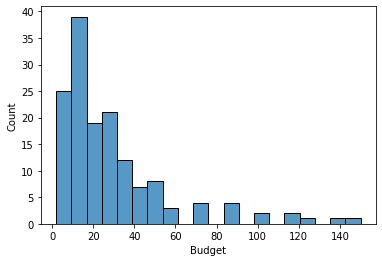

In [13]:
sn.histplot(bolly_df['Budget'],bins=20);

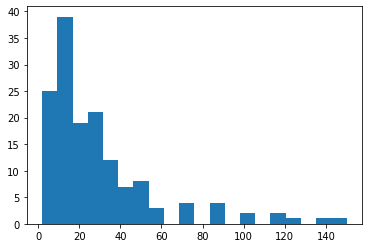

In [14]:
plt.hist(bolly_df['Budget'],bins=20);


C:\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


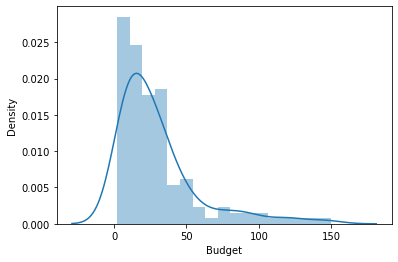

In [15]:
sn.distplot(bolly_df['Budget']);

C:\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


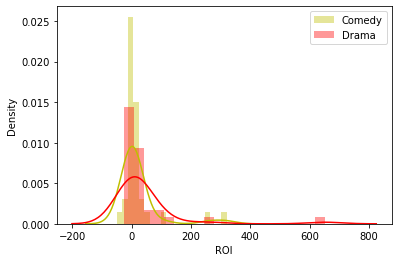

In [16]:
# Compare the distribution of ROIs between movies with comedy genre and drama. Which genre typically sees higher ROIs?
sn.distplot(bolly_df[bolly_df['Genre'] == 'Comedy']['ROI'],color='y',label="Comedy",bins=20);
sn.distplot(bolly_df[bolly_df['Genre'] == ' Drama ']['ROI'],color='r',label="Drama",bins=20);

plt.legend();

In [17]:
#  Is there a correlation between box office collection and YouTube likes? Is the correlation positive or negative?
bolly_df[['BoxOfficeCollection','YoutubeLikes']].corr()

,BoxOfficeCollection,YoutubeLikes
BoxOfficeCollection,1.000000,0.682517
YoutubeLikes,0.682517,1.000000


In [18]:
# Which genre of movies typically sees more YouTube likes? Draw boxplots for each genre of movies to compare
bolly_df.groupby('Genre')['YoutubeLikes'].mean().reset_index()

,Genre,YoutubeLikes
0,Drama,7973.628571
1,Action,18340.666667
2,Action,5573.000000
3,Comedy,4784.722222
4,Romance,7089.640000
5,Thriller,4924.000000
6,Thriller,5096.000000


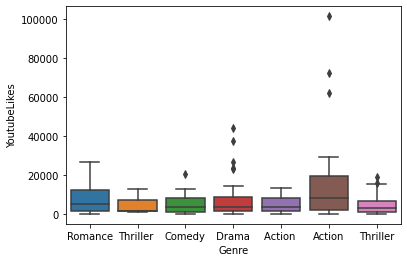

In [19]:
#  Which genre of movies typically sees more YouTube likes? Draw boxplots for each genre of movies to compare.
sn.boxplot(x='Genre',y='YoutubeLikes',data=bolly_df);

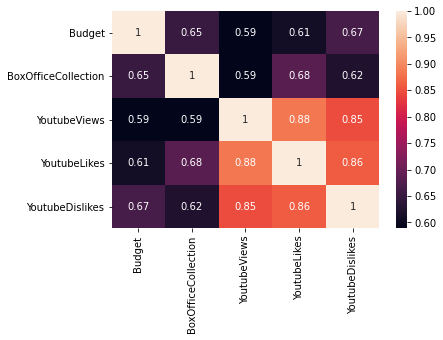

In [20]:
# Which of the variables among Budget, BoxOfficeCollection, YoutubeView, YoutubeLikes, YoutubeDislikes are highly correlated? Note: Draw pair plot or heatmap.
feature_corre = ['Budget','BoxOfficeCollection','YoutubeViews','YoutubeLikes','YoutubeDislikes']
sn.heatmap(bolly_df[feature_corre].corr(),annot=True);